In [42]:
# Importing Basic Libraries
import os
import pandas as pd
from pathlib import Path
import csv
import numpy as np

In [43]:
# Importing Libraries for Optimal Portfolio Creation and Monte Carlo
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from mc_data_mess1 import MC_Df_Simulation

In [44]:
# Importing Libraries for Dashboard Creation
import panel as pn
import hvplot.pandas
import ipywidgets as widgets

In [48]:
# Reading in daily prices dataframe containing one year of stock data from Gold, SP500, BTC, VNQ (real estate etf), and FAANG (a combination of tech stocks: Facebook, Apple, Amazon, Netflix, Google)

filepath = ("../data/csv_files/CLEAN_CSV_Project.csv")

df = pd.read_csv(filepath)

assets = df.set_index("Date")

pct_change = assets.pct_change().dropna()

In [119]:
# Creating widgets to allow user to interact with creating their on portfolio based on their allocation of weights

wGLD = widgets.IntSlider(description="Gold", step=5, value=20)

wSNP = widgets.IntSlider(description="SNP500", step=5, value=20)

wVNQ = widgets.IntSlider(description="VNQ", step=5, value=20)

wBTC = widgets.IntSlider(description="BTC", step=5, value=20)

wFNG = widgets.IntSlider(description="FNG",step=5, value = 20)


display(wGLD, wSNP, wVNQ, wBTC, wFNG)

IntSlider(value=20, description='Gold', step=5)

IntSlider(value=20, description='SNP500', step=5)

IntSlider(value=20, description='VNQ', step=5)

IntSlider(value=20, description='BTC', step=5)

IntSlider(value=20, description='FNG', step=5)

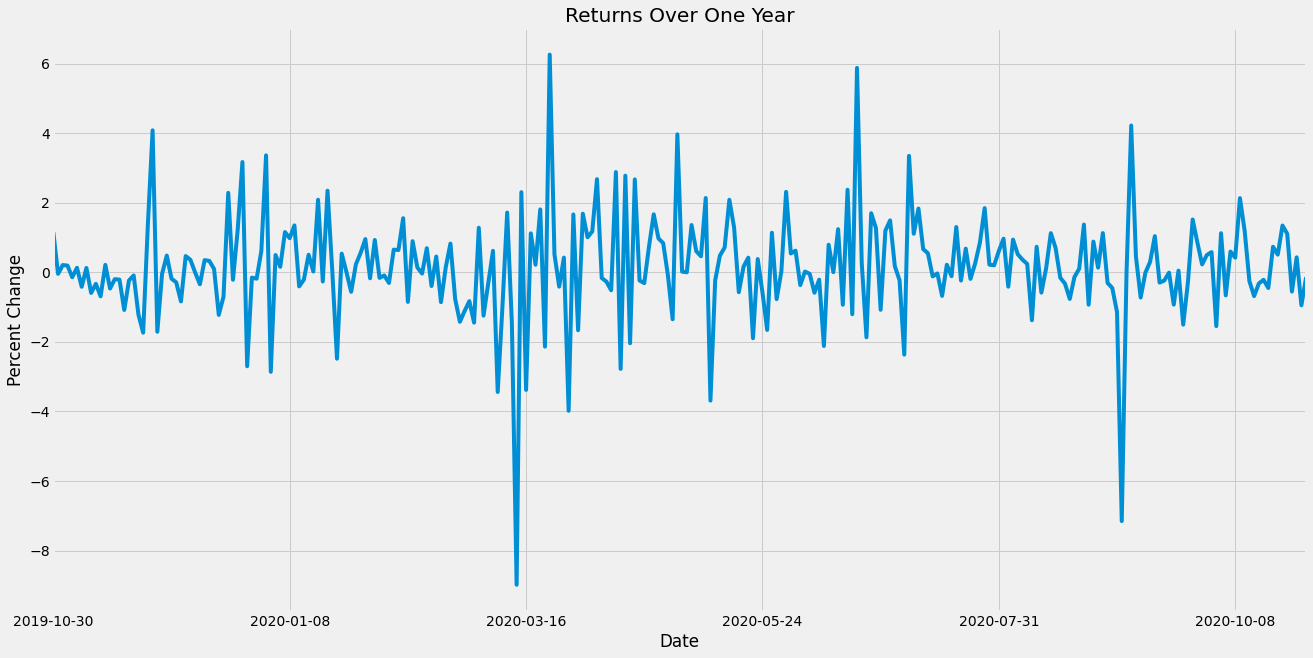

In [120]:
# Creating Plot that is linked to the widget interaction above

GLD = wGLD.value
SNP = wSNP.value
VNQ = wVNQ.value
BTC = wBTC.value
FNG= wFNG.value

if GLD + SNP + VNQ + BTC + FNG == 100:
    portfolio_weights = [GLD, SNP, VNQ, BTC, FNG]

    portfolio_return = pct_change.dot(portfolio_weights)

    plot = portfolio_return.plot(title = "Returns Over One Year", figsize = (20, 10))
    plot = plot.set_ylabel("Percent Change")
    plot
    #portfolio_return.hvplot()


else:
    print("Adjust your inputs. Total weight must equal 100")


In [60]:
# After allowing user to create their own best return, we created an optimized weighting using an efficient frontier analysis

assets_project = ["Gold", "sp500", "VNQ", "BITCOIN", "FAANG"]

In [61]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

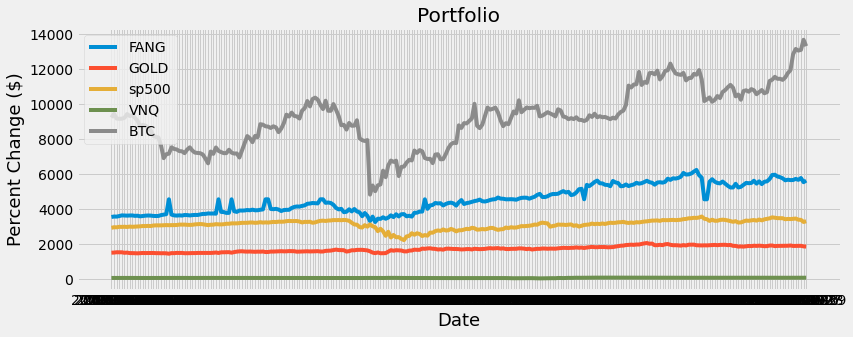

In [62]:
title = "Portfolio"
# created using the daily prices of all assets above
assets 
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in assets.columns.values:
  plt.plot( assets[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Percent Change ($)',fontsize=18)
plt.legend(assets.columns.values, loc='upper left')
plt.show()

In [72]:
returns = assets.pct_change()

In [82]:
cov_matrix_annual = assets.cov() * 252
cov_matrix_annual

,FANG,GOLD,sp500,VNQ,BTC
FANG,1.566919e+08,2.979589e+07,2.918407e+07,1.042869e+06,2.760244e+08
GOLD,2.979589e+07,6.776496e+06,4.258897e+06,2.026336e+05,5.263896e+07
sp500,2.918407e+07,4.258897e+06,1.638756e+07,2.886518e+05,7.480399e+07
VNQ,1.042869e+06,2.026336e+05,2.886518e+05,1.987938e+04,1.860034e+06
BTC,2.760244e+08,5.263896e+07,7.480399e+07,1.860034e+06,7.254176e+08


In [83]:
# Portfolio Variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

73819770.25764994

In [84]:
# Portfolio Volatility (aka STANDARD DEVIATION)
port_volatility = np.sqrt(port_variance)
port_volatility 

8591.843239820542

In [103]:
# Annual Return (raw return on investment)
portfolioSimpleAnnualReturn = np.sum(assets.mean()*weights) * 252
portfolioSimpleAnnualReturn

941186.0451235956

In [109]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 94118605.0%
Annual volatility/standard deviation/risk : 859184.0%
Annual variance : 7381977026.000001%


In [110]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [113]:
mu = expected_returns.mean_historical_return(assets)
S = risk_models.sample_cov(assets)

In [117]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('FANG', 0.13135), ('GOLD', 0.57923), ('sp500', 0.16066), ('VNQ', 0.08552), ('BTC', 0.04323)])
Expected annual return: 24.7%
Annual volatility: 16.4%
Sharpe Ratio: 1.39


(0.24689286554839024, 0.16351786248450942, 1.387572355099031)

In [118]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(assets)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=150000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'FANG': 4, 'GOLD': 47, 'sp500': 8, 'VNQ': 137}
Funds remaining: $268.28


In [ ]:
# ds]==